In [42]:
# 1. IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
# 2. DATA LOADING
# Using the official Scikit-Learn dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target # Our target variable
print(f"Dataset loaded with {df.shape[0]} instances and {df.shape[1]} columns.")
# Displaying the first 5 rows of the complete DataFrame
print("--- First 5 rows of the data manual ---")
display(df.head())

Dataset loaded with 20640 instances and 9 columns.
--- First 5 rows of the data manual ---


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


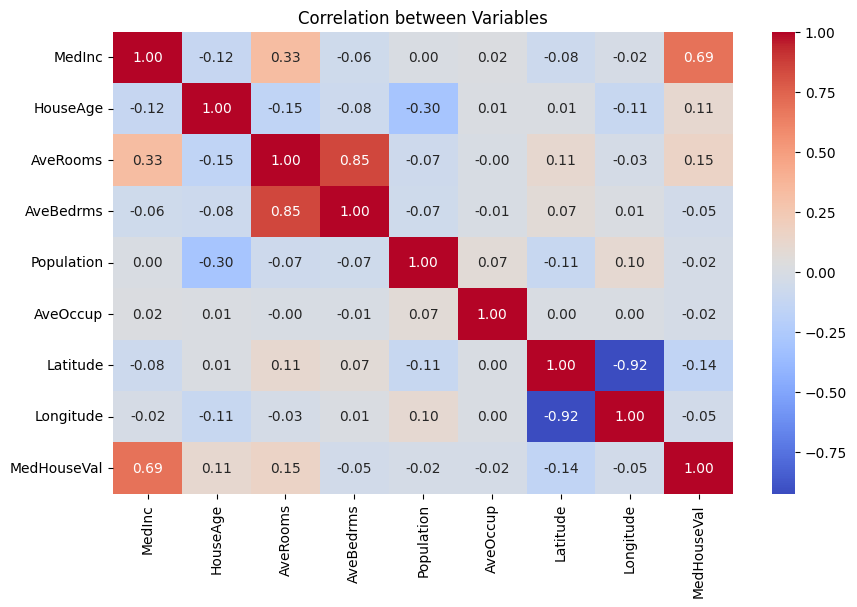

In [44]:
# 3. RAPID EXPLORATORY ANALYSIS (RAA)

# CONCEPT: PEARSON CORRELATION
# Correlation is a statistical measure that indicates the strength and direction of the linear relationship
# between two variables. The coefficient ranges from -1 to 1:

# * Close to 1: Strong Positive Correlation (Both increase together).

# * Close to 0: No linear relationship (The variables are independent).

# * Close to -1: Strong Negative Correlation (When one increases, the other decreases).

# USEFULNESS IN THE MANUAL:
# This graph helps us with 'Feature Selection', allowing us to focus
# on the variables that truly impact the house price and identify redundancies.

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between Variables")
plt.show()

#INSIGHTS FROM THE CORRELATION ANALYSIS:

#1. Primary Predictor (MedInc): The variable 'MedInc' (Average Income) shows the highest positive correlation (0.69) with 
# the property value. Note that other values ​​such as HouseAge (0.11) and AveRooms (0.15), and the others, are not as high as MedInc. 
# This makes MedInc the most important predictor. This indicates that the income of the region is the factor with the greatest 
# weight for price predictions in this linear model.

#2. Multicollinearity Identified: A very high correlation (0.85) is observed between 'AveRooms' and 'AveBedrms'. 
# In advanced model architectures, this redundancy could be addressed to avoid noise, since both features 
# deliver similar information.

#3. Irrelevant Variables: Columns such as 'Population' and 'AveOccup' show a correlation
# close to zero with the target. This suggests that these isolated variables have low explanatory power
# for price variation from a linear perspective.

In [45]:
# 4. DATA PREPARATION

# X (Features): We select the input variables.
# The insight from Step 3 showed us that 'MedInc' is essential, but here we keep
# the others so that the model learns the linear relationships between them.
X = df.drop('MedHouseVal', axis=1)

# y (Target): The value we want to predict (house price).
y = df['MedHouseVal']


# WHY DIVIDE THE DATA?

# In Machine Learning, we need to ensure that the model learns patterns and doesn't just memorize 
# the data (Overfitting). To do this, we separate the dataset into:

# 1. Training (80%): The algorithm's study material.
# 2. Test (20%): The 'final exam' with data the model has never seen.

# ABOUT THE LINE BELOW:
# - test_size=0.2: Defines the proportion of the test (20%).
# - random_state=42: This is the 'seed' of randomness. We use the number 42 as a tribute to 'The Hitchhiker's Guide to the Galaxy' 
# (the answer to life, the universe, and everything).

# Technically, this ensures that the data division is REPRODUCIBLE: every time you run this manual, 
# you will have exactly the same training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Treino: {X_train.shape[0]} amostras | Teste: {X_test.shape[0]} amostras")

Treino: 16512 amostras | Teste: 4128 amostras


In [46]:
# 5. MODEL TRAINING

# We instantiate the Linear Regression algorithm.
# Important to note: this algorithm internally uses the mathematical method
# of 'Ordinary Least Squares' to calculate the line
# that best fits the data. It calculates the difference between the actual value and 
# the predicted value, squares it (to eliminate negative signs), and tries
# to minimize the sum of these errors to find the ideal position of the line.
model = LinearRegression()

# The fit() method executes the training, calculating the ideal weights
# for each variable based on the training data (X_train, y_train).
model.fit(X_train, y_train)

# --- EXPLANATION OF RESULTS ---

# 1. INTERCEPT (b): The Initial State / Default Value of the Model.

# LOGICAL DEFINITION: Represents the 'starting point' on the vertical axis (Y).
# If all input parameters (income, rooms, age, etc.) were
# exactly ZERO, the resulting prediction value would be the Intercept itself.

# IMPORTANCE IN THE GRAPH: It is fundamental for defining the initial positioning
# of the 'Regression Line'. Without it, the line would be forced to start
# at the origin (0,0), which would not reflect the reality of market prices.

# DATA SOURCE: This value (-37.02) was calculated by the 'Least Squares' algorithm during training.
#  It functions as an 'offset' (compensation) necessary for the line to align perfectly with the
# center of the cloud of real points, ensuring the smallest possible margin of error.
print(f"Intercept (b): {model.intercept_}")

# 2. COEFFICIENTS (w): The weight/influence of each variable.

# A positive value indicates that the variable increases the price of the house.
# A negative value indicates that the variable reduces the price of the house.
coeficientes_series = pd.Series(model.coef_, index=X.columns)
print(f"Coefficients (w): \n{coeficientes_series}")

# --- INSIGHTS FROM YOUR TRAINING ---

# 1. MedInc (0.448): This is the MOST RELEVANT predictor.
# Although the coefficient is lower than AveBedrms', the mathematics from Step 3
# (Correlation of 0.69) proves that this variable is the most consistent.
# In addition, its value scale is larger, generating the greatest real impact on the final price.

# 2. AveBedrms (0.783): Has HIGH unitary SENSITIVITY.
# The algorithm assigns a high weight to each new room, however, as the
# variation of this metric is small (short scale) and its original correlation
# was low, it does not have the same predictive power as Income.

# 3. Latitude/Longitude (-0.42): Critical Geographic Influence.
# The negative weights mathematically confirm that, in California,
# property values ​​decrease as we move away from the Southwest coast.

# 4. Low Impact Variables (HouseAge, Population, AveOccup):
# Coefficients close to zero confirm the analysis from Step 3:
# These variables provide little useful 'signal' to the linear model.

Intercept (b): -37.02327770606419
Coefficients (w): 
MedInc        0.448675
HouseAge      0.009724
AveRooms     -0.123323
AveBedrms     0.783145
Population   -0.000002
AveOccup     -0.003526
Latitude     -0.419792
Longitude    -0.433708
dtype: float64


In [47]:
# 6. PREDICTION AND EVALUATION
# The model uses the calibrated line (with an intercept of -37.02) to predict the Test.
y_pred = model.predict(X_test)

# MSE (Mean Squared Error):
# Measures the average of the squared errors. It's our 'cost' metric:
# The lower the value, the less the model erred in relation to the actual prices.
mse = mean_squared_error(y_test, y_pred)

# R² (Coefficient of Determination):
# This is the 'Score' of the model. It indicates that our combination of variables
# (led by Average Income) explains approximately XX% of the price variation.
# An R² close to 0.60 is considered a good starting point for linear models.
r2 = r2_score(y_test, y_pred)

print(f"\n--- Performance do Modelo ---")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


--- Performance do Modelo ---
MSE: 0.5559
R² Score: 0.5758


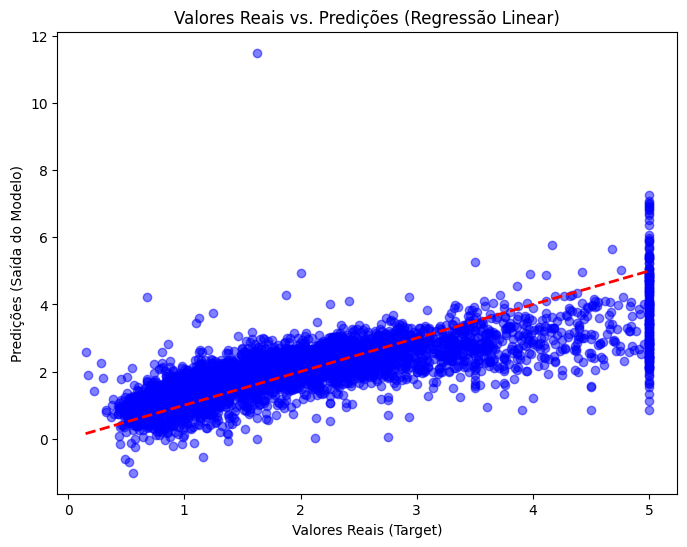

In [48]:
# 7. VISUALIZATION OF RESULTS

# This graph is the visual 'stress test' of the model.
# The goal is to observe how closely our predictions (Y) match reality (X).

# The red dashed line represents the perfect scenario (Prediction == Real).
# The blue cloud represents the actual behavior of our algorithm.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)

# If the points follow the red line, our 'Linear Architecture' was successful.
# If the points were scattered randomly, the model would be invalid.
plt.xlabel("Valores Reais (Target)")
plt.ylabel("Predições (Saída do Modelo)")
plt.title("Valores Reais vs. Predições (Regressão Linear)")
plt.show()

# FINAL INSIGHT: Note that the model is very good for mid-range homes,
# but tends to be more inaccurate at the extremes (very cheap or very expensive homes).

In [49]:
# 8. THE MODEL IN ACTION (PREDICTION OF NEW DATA)

# We created a fictional scenario: a house with a high average income,
# a few years old and well located.
nova_casa = {
    'MedInc': [8.5],         # Average Income (Dataset scale)
    'HouseAge': [15.0],      # House Age
    'AveRooms': [6.0],       # Average Rooms
    'AveBedrms': [1.0],      # Average Bedrooms
    'Population': [800.0],   # Local Population
    'AveOccup': [3.0],       # Average Occupancy
    'Latitude': [34.05],     # Location (near LA)
    'Longitude': [-118.24]   # Location (near LA)
}

# Converting to DataFrame so the model can process it
df_novo = pd.DataFrame(nova_casa)

# Making the prediction
previsao = model.predict(df_novo)

print(f"--- Evaluation Simulation ---")
print(f"House Data: Income {nova_casa['MedInc'][0]} | Bedrooms {nova_casa['AveBedrms'][0]}")
print(f"Estimated Price by the Model: ${previsao[0] * 100000:.2f}")

# TECHNICAL EXPLANATION FOR THE MANUAL:
# Here 'model.predict' is executing the equation: y = (w1*x1 + w2*x2...) + b.
# It uses the weights (w) and the intercept (b) calculated in Step 5 to 
# transform the input features into an estimated real price.

--- Evaluation Simulation ---
House Data: Income 8.5 | Bedrooms 1.0
Estimated Price by the Model: $395503.25
